<a href="https://colab.research.google.com/github/tulashiprasad/pytorch/blob/main/02_neural_network_classification_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network Classification

## 1. Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 sample
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: \n {X[:5]}")
print(f"Frist 5 samples of y: \n {y[:5]}")

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Frist 5 samples of y: 
 [1 1 1 1 0]


In [ ]:
# Make DAtaFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2":X[:, 1], "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


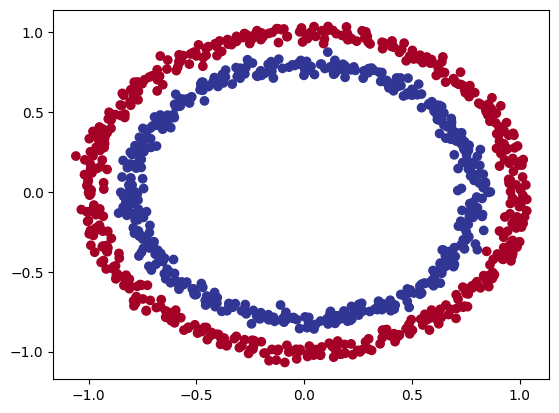

In [ ]:
# Visualize, Visualize, Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

### Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y : {y_sample}")
print(f"Shapes for one sample of X : {X_sample.shape} and same for y : {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y : 1
Shapes for one sample of X : (2,) and same for y : ()


### Turn data into tensors and create train and test split

In [ ]:
# Turn data into tensor
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Trun data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a model

Lets build a model to classify out blue and red dots

To do so, we want to :
1. Setup device agnostic code so out model will run on GPU if there is one
2. Construct a mdoel (by subclassing `nn.Module`)
3. Create a training and test loop


In [ ]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

## Now we've setup device agnostic code, let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handeling the shapes or our data
3. Define a `forward()` method that outlines the forward pass( or forward computation ) of the mdoel
4. Instantiate an instance of out model class and sent it to the target `device`m

In [ ]:
from sklearn import datasets
# 1. Construct a mdoel that subclasses nn.Module
class CircleModuelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2.Create 2 nn.Linear layers capable of handling the shapes of out data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features and upscales them to 5
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes infeautes from previous layer's out features

  # Define forward() method that outlines the forward passs
  def forward(self, x):
    return(self.layer_2(self.layer_1(x))) # x-> layer_1 -> layer_2


# Instantiate an instance of out model class and sent it to target device

model_0 = CircleModuelV0().to(device)
model_0


CircleModuelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
 device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Let's replicate the model above using nn.sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features= 5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6875, -0.5780],
                      [-0.1210,  0.0413],
                      [-0.4379, -0.4013],
                      [-0.3373, -0.2411],
                      [ 0.2215,  0.1625]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4545, -0.3012, -0.4446,  0.2148, -0.5290], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1431,  0.3194,  0.0795,  0.0233, -0.1714]], device='cuda:0')),
             ('1.bias', tensor([-0.2771], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n {torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")



Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
 tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]], device='cuda:0')

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss functin and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or SME error

For classfification you might want binary cross entropy or categorical cross entropy (cross entropy)

And for optimizers, tow of the most common and useful are SGD and Adam, however PyTorch has many build-in options

* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`

In [ ]:
# Setup the loss function
#  loss_fn = nn.BCELoss # this requires inputs to have gove through the sigmoid activation fruncion prior to input BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss() = sigmoid activation function build-in

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does out mode get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

 ## Train model

To train our model we're going to need to build a training loop with the following steps:
1. Forward Pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss Backwards(backpropagation)
5. Optimizer step(gradient descent)

## 3.1 Going from raw logits -> prediction probabilities -> prediction labesl
Our model outputs are goning to be raw **logits**

We can convert these ** logits ** inot **prediction probabilitie** by passing them to some kind of activation function (example, sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** either by rounding them or taking the `argmax()`

In [ ]:
model_0 # the raw outputs wihtout any activation functions produced by this raw model are called logits

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# View the first five outputs of the forward pass on the test data
y_logits   = model_0(X_test.to(device))[:5]
y_logits # The raw outputs of out model are clled logits

tensor([[-0.1454],
        [-0.2219],
        [-0.1045],
        [-0.1563],
        [-0.3582]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4637],
        [0.4448],
        [0.4739],
        [0.4610],
        [0.4114]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:
# Find the predicted lables, since out labes are either 0 or 1 we need to round off there prediction values to match the labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_train.to(device))[:5]))

# Check if y_preds and y_pred_labels are equal
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze(), y_pred_labels


tensor([True, True, True, True, True], device='cuda:0')


(tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]], device='cuda:0', grad_fn=<RoundBackward0>))

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Build a training loop

In [ ]:
torch.manual_seed(42)

epochs = 200

# Put data to the target device
X_train, y_train  = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build the trining and evaluation loop
for epoch in range(epochs):
  ### Training ####
  model_0.train()

  # 1. Forward Pass
  y_logits = model_0(X_train).squeeze() # Squeeze to remove `1` extra dimension
  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits into predicion labels

  # 2. Calcualte the loss
  train_loss = loss_fn(y_logits, y_train) # Using BCEWithLogitsLoss works with raw logits

  train_accuracy = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero gard
  optimizer.zero_grad()

  # 4. Loss Backwards
  train_loss.backward()

  # Optimizer step
  optimizer.step()


  ### Testing ####
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calcualte the loss/accuracy

    test_loss =  loss_fn(test_logits, y_test)

    test_accuracy = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print out what is happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {train_accuracy:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%")



Epoch: 0 | Loss: 0.70361, Accuracy: 50.00% | Test loss: 0.70078, Test acc: 50.00%
Epoch: 10 | Loss: 0.69873, Accuracy: 43.75% | Test loss: 0.69672, Test acc: 47.50%
Epoch: 20 | Loss: 0.69664, Accuracy: 48.38% | Test loss: 0.69515, Test acc: 46.50%
Epoch: 30 | Loss: 0.69561, Accuracy: 48.75% | Test loss: 0.69449, Test acc: 47.50%
Epoch: 40 | Loss: 0.69502, Accuracy: 49.88% | Test loss: 0.69418, Test acc: 46.00%
Epoch: 50 | Loss: 0.69463, Accuracy: 49.88% | Test loss: 0.69402, Test acc: 47.50%
Epoch: 60 | Loss: 0.69433, Accuracy: 49.62% | Test loss: 0.69392, Test acc: 48.00%
Epoch: 70 | Loss: 0.69410, Accuracy: 49.88% | Test loss: 0.69386, Test acc: 47.50%
Epoch: 80 | Loss: 0.69391, Accuracy: 50.12% | Test loss: 0.69383, Test acc: 47.50%
Epoch: 90 | Loss: 0.69376, Accuracy: 50.12% | Test loss: 0.69382, Test acc: 48.00%
Epoch: 100 | Loss: 0.69363, Accuracy: 49.88% | Test loss: 0.69382, Test acc: 48.50%
Epoch: 110 | Loss: 0.69352, Accuracy: 49.62% | Test loss: 0.69382, Test acc: 50.00%
Epo

## Make predictions and evaluate the model

Form above information it seems like model is making random guessing,
lets visualize the data for this we import a helper funcion from github


In [ ]:
import requests
from pathlib import Path

# download herlper funcion from Learn PyTorch repo(if not already downloaded)
if Path('helper_functions.py').is_file():
  print("helper function already downloaded, skipping download")

else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


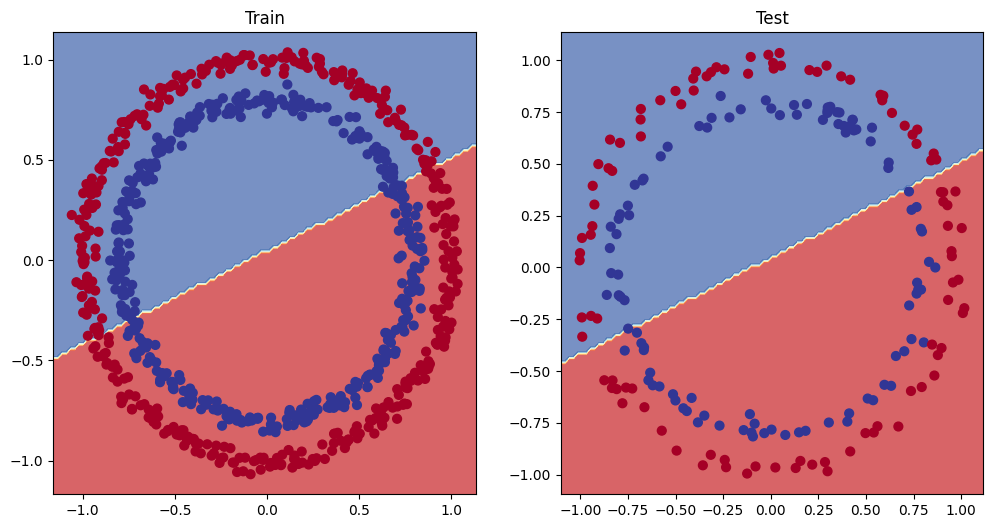

In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundry for training and testing sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model ( from model perspective)
Let's try to fix our model's underfitting problem.

Let's see what happens if we add an extra layer to our model, fit for longer `1000 eopchs` instead of `100 epochs` and increate the number of hidden layers from `5` to `10`.

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  # Define the forward method

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create loss and optimizer instance
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
# Write a training loop
torch.manual_seed(42)

epochs = 1000
# Put test and train data to the device

X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  # 0. Set model in training mode
  model_1.train()

  # 1. Forward Pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calcualte the loss and accuracy
  train_loss = loss_fn(y_logits, y_train)
  train_accuracy = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero gard
  optimizer.zero_grad()

  # 4. Loss abckward
  train_loss.backward()

  # 5. Optimizer step()
  optimizer.step()

  ## Testing ##

  # 0. put the model in evaluation mode
  model_1.eval()

  # 1. Forward pass
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print what's happening every 10 eopchs

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {train_accuracy:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%")



Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 10 | Loss: 0.69369, Accuracy: 50.25% | Test loss: 0.69270, Test acc: 50.00%
Epoch: 20 | Loss: 0.69351, Accuracy: 50.12% | Test loss: 0.69283, Test acc: 49.50%
Epoch: 30 | Loss: 0.69339, Accuracy: 50.50% | Test loss: 0.69297, Test acc: 48.00%
Epoch: 40 | Loss: 0.69329, Accuracy: 50.38% | Test loss: 0.69310, Test acc: 49.00%
Epoch: 50 | Loss: 0.69322, Accuracy: 49.88% | Test loss: 0.69324, Test acc: 50.00%
Epoch: 60 | Loss: 0.69317, Accuracy: 49.38% | Test loss: 0.69336, Test acc: 51.50%
Epoch: 70 | Loss: 0.69312, Accuracy: 49.38% | Test loss: 0.69348, Test acc: 50.50%
Epoch: 80 | Loss: 0.69309, Accuracy: 50.12% | Test loss: 0.69359, Test acc: 50.00%
Epoch: 90 | Loss: 0.69307, Accuracy: 50.50% | Test loss: 0.69370, Test acc: 48.50%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 110 | Loss: 0.69303, Accuracy: 50.88% | Test loss: 0.69388, Test acc: 46.50%
Epo

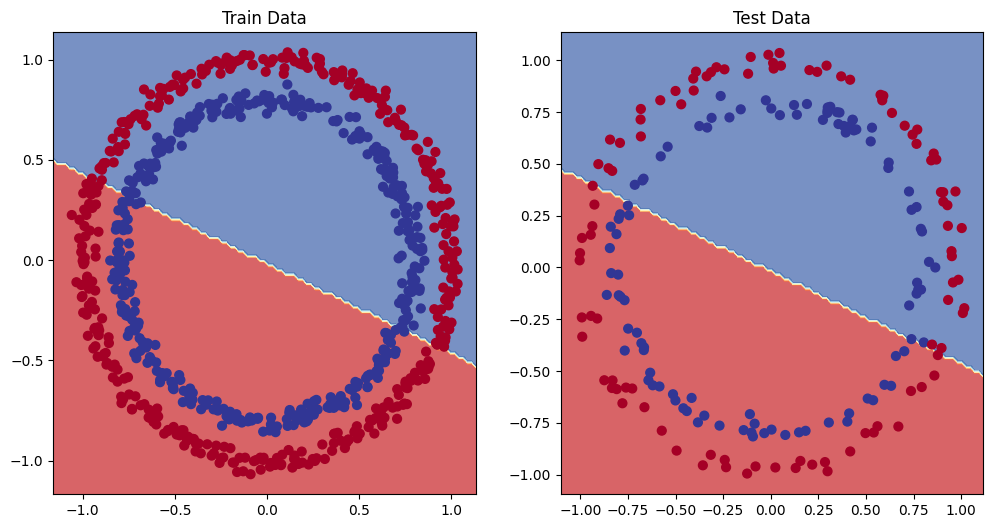

In [ ]:
# Plot decision boundries for training and testing data to visaulalize the data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train Data")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test Data")
plot_decision_boundary(model_1, X_test, y_test)

Our model is still drawing stright line betwen red and blue dots, so the additon f new layaer and extra training epoch doestn seem to have much effect to this training data(or model)

Since out model is drawing a stringt line can we fit this in a regression problem that discussed in `nodebook 01` ?? Tes's try it now!!!

In [ ]:
# create  data
wight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = wight * X_regression + bias # Linear regression formula

# Check the data

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create test and train sets
train_split = int(0.8 * len(X_regression))
X_train, X_test = X_regression[:train_split], X_regression[train_split:]
y_train, y_test = y_regression[:train_split], y_regression[train_split:]
print(len(X_train), len(y_train), len(X_test), len(y_test))

80 80 20 20


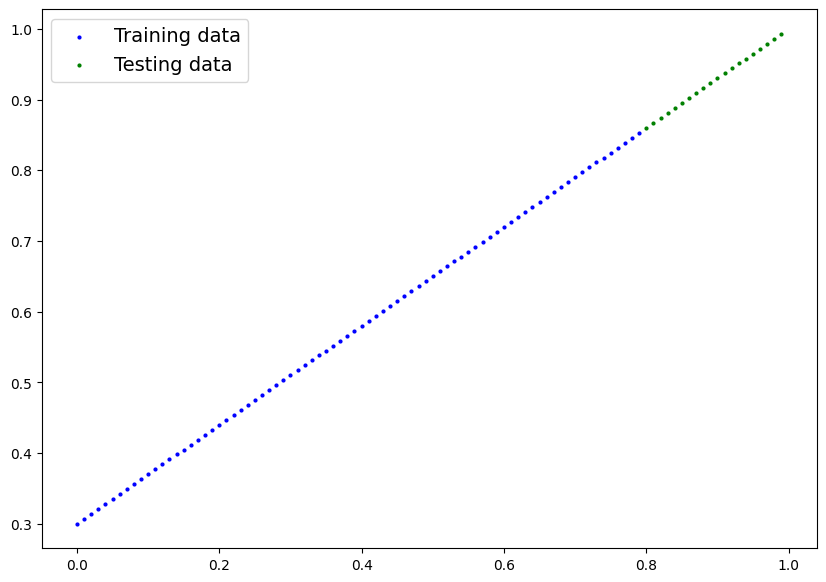

In [ ]:
# Visualize the data

plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

### Adjusting `model_1` to fit a straight line

In [ ]:
# Same architecture as model_1 ( But using sequencial )
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# create instant of loss function and optimizer
loss_fn = nn.L1Loss()
optimizer  = torch.optim.SGD(model_2.parameters(), lr=0.01)

### strat training

In [ ]:
torch.manual_seed(42)
eopchs = 1500

X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(X_train)
  train_loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()


  model_2.eval()

  with torch.inference_mode():
    test_pred = model_2(X_test)

    test_loss = loss_fn(test_pred, y_test)

 # Print out what's happening
  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {train_loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.91103
Epoch: 100 | Train loss: 0.02858, Test loss: 0.00081
Epoch: 200 | Train loss: 0.02533, Test loss: 0.00209
Epoch: 300 | Train loss: 0.02137, Test loss: 0.00305
Epoch: 400 | Train loss: 0.01964, Test loss: 0.00341
Epoch: 500 | Train loss: 0.01940, Test loss: 0.00387
Epoch: 600 | Train loss: 0.01903, Test loss: 0.00379
Epoch: 700 | Train loss: 0.01878, Test loss: 0.00381
Epoch: 800 | Train loss: 0.01840, Test loss: 0.00329
Epoch: 900 | Train loss: 0.01798, Test loss: 0.00360


Unlike `model_1`, in case of regression i.e `model_2` the loss is actually going down, so lets predict form `model_2`

cuda:0 cuda:0 cuda:0 cuda:0


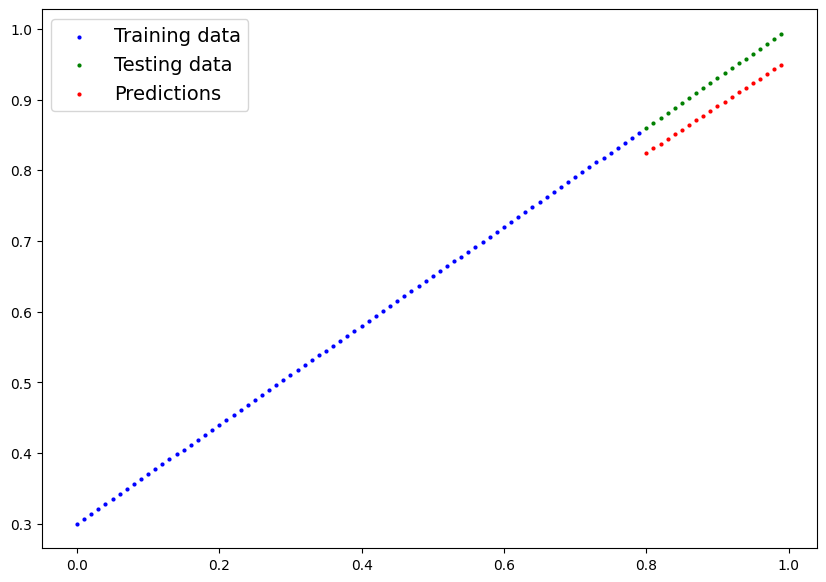

In [ ]:
# Trun on the evaluation mode
model_2.eval()

# Make predictions

with torch.inference_mode():
  y_preds = model_2(X_test.to(device))

print(X_train.device, X_test.device, y_train.device, y_test.device)
# Plot predictions

plot_predictions(
    train_data=X_train.cpu(),
    train_labels=y_train.cpu(),
    test_data=X_test.cpu(),
    test_labels=y_test.cpu(),
    predictions=y_preds.cpu()
)

## 6. The missing piece of puzzle: non-linearity

It looks like out mode is actuallly gettin trained and prividing real predictions insted of just guessing

### Recreating non-linear data

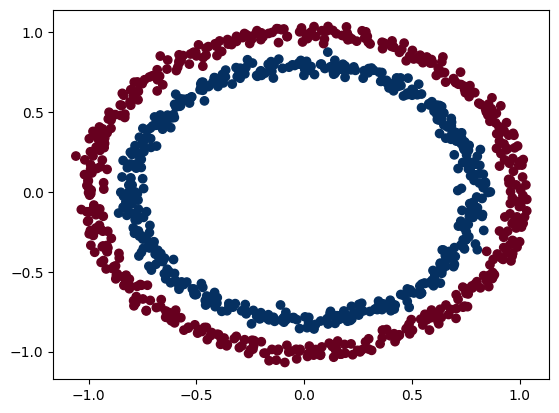

In [ ]:
# Make plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);


### Let's split training and testing data

In [ ]:
# Convert to tensors and split into train and test sets

import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
# Build model iwth non-linear activation function (for this we are using ReLU)

from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2  = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.ReLu = nn.ReLU()

   # you can also use self.sigmoid() here, as a layer, if yo do so, you don't need to use it on predictions

  def forward(self, x):
    return self.layer_3(self.layer_2(self.ReLu(self.layer_1(x))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (ReLu): ReLU()
)

### Building a model with non-linearity

In [ ]:
# Setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### Training model with non-linearity

In [ ]:
torch.manual_seed(42)
epochs = 1000

# Put all the data to target device

X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  # 1. Forward Pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  train_loss = loss_fn(y_logits, y_train)
  train_accuracy = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3.Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  train_loss.backward()

  # 5. Optimzer step
  optimizer.step()

  ### Testing ###

  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss  = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(y_true=y_test, y_pred=test_preds)

  # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {train_accuracy:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_accuracy:.2f}%")


Epoch: 0 | Loss: 0.69441, Accuracy: 50.00% | Test Loss: 0.69412, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.68984, Accuracy: 52.38% | Test Loss: 0.68935, Test Accuracy: 51.00%
Epoch: 200 | Loss: 0.68707, Accuracy: 58.25% | Test Loss: 0.68601, Test Accuracy: 59.00%
Epoch: 300 | Loss: 0.68338, Accuracy: 53.87% | Test Loss: 0.68177, Test Accuracy: 58.00%
Epoch: 400 | Loss: 0.67826, Accuracy: 53.87% | Test Loss: 0.67591, Test Accuracy: 57.00%
Epoch: 500 | Loss: 0.67058, Accuracy: 53.25% | Test Loss: 0.66753, Test Accuracy: 58.00%
Epoch: 600 | Loss: 0.65828, Accuracy: 59.13% | Test Loss: 0.65466, Test Accuracy: 59.00%
Epoch: 700 | Loss: 0.63517, Accuracy: 71.75% | Test Loss: 0.63262, Test Accuracy: 75.00%
Epoch: 800 | Loss: 0.59027, Accuracy: 85.88% | Test Loss: 0.59330, Test Accuracy: 87.00%
Epoch: 900 | Loss: 0.51050, Accuracy: 94.12% | Test Loss: 0.52613, Test Accuracy: 90.50%


 ### this looks far much netter

### Evaluating the model trained with non-linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_train))).squeeze()

y_preds[:10], y[:10]

(tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

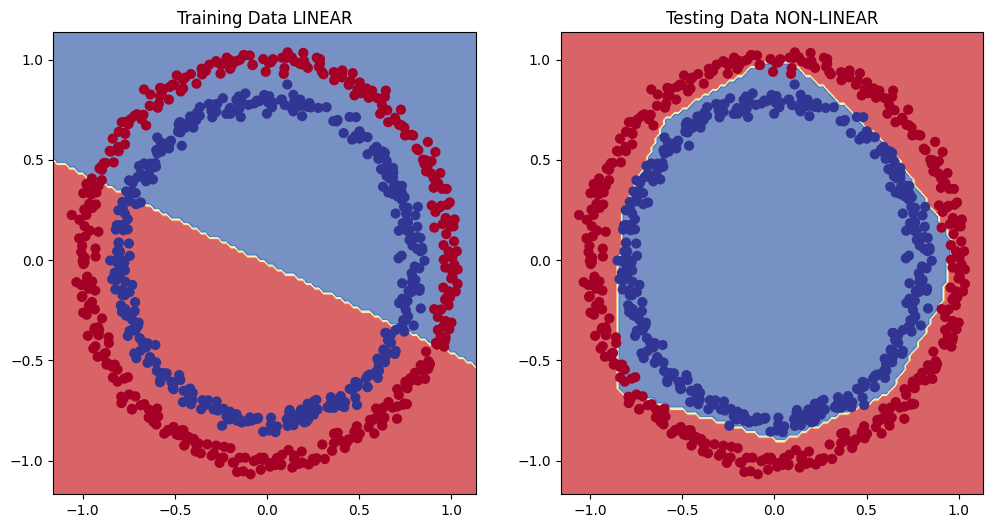

In [ ]:
# Plot decision boundries for training and testing data

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training Data LINEAR")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing Data NON-LINEAR")
plot_decision_boundary(model_3, X_train, y_train)

## Putting things together by building a multi class PyTorch model

## 8.1 Create multi-class classification data

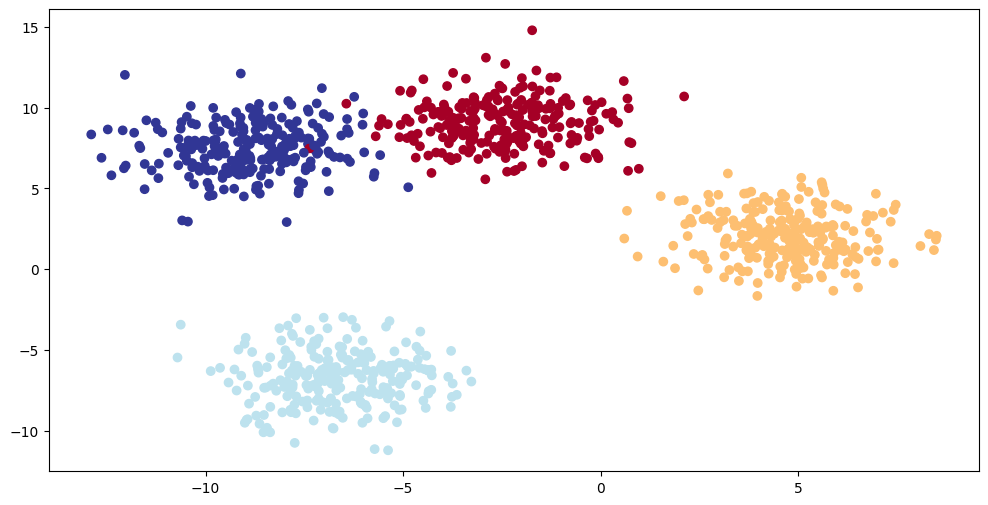

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation

NUM_CLASS = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASS, cluster_std=1.5, random_state=RANDOM_SEED)

# 2. Turan data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# print( y_blob)

# 3. Train test split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)
# 4. plot the data

plt.figure(figsize=(12, 6))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### Building model in PyTorch

In [ ]:
# create a device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch import nn

# build the model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

blob_model = BlobModel(input_features=NUM_FEATURES, output_features=NUM_CLASS, hidden_units=8).to(device)
blob_model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
# Creating loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(blob_model.parameters(), lr=0.1)


In [ ]:
# Get the predicion probabilities
blob_model(X_blob_train.to(device)[:5])

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
# How many elements in a single prediction sample?
blob_model(X_blob_train.to(device))[0].shape, NUM_CLASS

(torch.Size([4]), 4)

In [ ]:
# Make prediction logits with model
y_logits = blob_model(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [ ]:
# sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[3])

tensor(1.0000, device='cuda:0', grad_fn=<SumBackward0>)

These prediction probabilities are essentially saying how much the model thinks the target X sample (the input) maps to each class.

Since there's one value for each class in y_pred_probs, the index of the highest value is the class the model thinks the specific data sample most belongs to.

We can check which index has the highest value using torch.argmax().

In [ ]:
print(y_pred_probs[0])
torch.argmax(y_pred_probs[0])

tensor([0.1872, 0.2918, 0.1495, 0.3715], device='cuda:0',
       grad_fn=<SelectBackward0>)


tensor(3, device='cuda:0')

 ### Create Training and Testing loop

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device).type(torch.long)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device).type(torch.long)

print(y_logits)
for epoch in range(epochs):
    ### Training
    blob_model.train()

    # 1. Forward pass
    y_logits = blob_model(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    blob_model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = blob_model(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940],
        [ 0.4418, -1.3851,  0.3083,  1.2086],
        [-1.5169, -0.8383, -1.7723, -0.7571],
        [-0.2796, -1.6213, -0.5212,  0.8142],
        [ 0.0087, -1.6676, -0.2100,  1.0779],
        [-0.1146, -1.7781, -0.3619,  1.0633],
        [ 1.4046, -1.2270,  1.3925,  1.8533],
        [ 1.7991, -1.2295,  1.8271,  2.1682],
        [ 1.7553,  0.1992,  1.9850,  1.0572],
        [ 1.7293, -1.4932,  1.7121,  2.3114],
        [ 2.0059, -0.9975,  2.0886,  2.1575],
        [ 1.3878, -1.3971,  1.3495,  1.9682],
        [ 0.2662, -1.2199,  0.1385

In [ ]:
# Make predictions
blob_model.eval()
with torch.inference_mode():
    y_logits = blob_model(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

In [ ]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


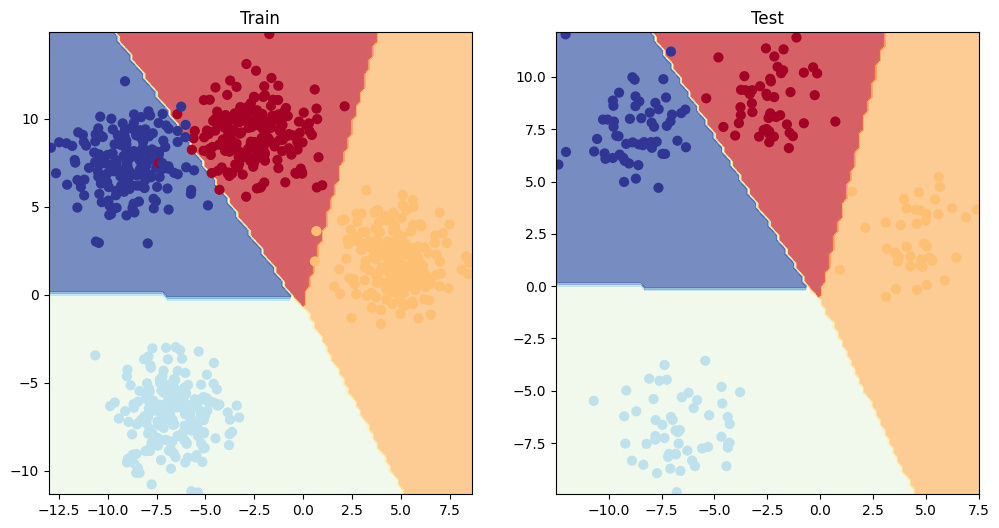

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(blob_model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(blob_model, X_blob_test, y_blob_test)